Lets set up all the stuff, do some filtering and write out what we need for network analysis tools

In [322]:
#Setup all the stuff we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests 
from contextlib import closing
import csv
import os
import statistics

In [323]:
#pull data from repsitory
url = "https://raw.githubusercontent.com/bigdatacup/Big-Data-Cup-2021/main/hackathon_scouting.csv"
  
with open(os.path.split(url)[1], 'wb') as f, \
        requests.get(url, stream=True) as r:
    for line in r.iter_lines():
        f.write(line+'\n'.encode())
        
scout=pd.read_csv('hackathon_scouting.csv')

In [324]:


#write out a spreadsheet for input to cytoscpe of complete/incomplete pass recievers 
#Data requires some spreadsheet jiggery pokery to make it in acceptable format for Cytoscape
passes=scout.loc[(scout['Home Team Skaters']==5)&(scout['Away Team Skaters']==5)&(scout['Event']=="Play")|(scout['Event']=="Incomplete Play")]
passes=passes.loc[(passes['Team']=="Erie Otters")]




#write out a spreadsheet for input to cytoscape of complete/incomplete pass makers
#Data requires some spreadsheet jiggery pokery to make it in acceptable format for Cytoscape

pass_sucess=pd.DataFrame(passes['Player'].groupby(passes['Event']).value_counts(sort=True))
pass_sucess.to_csv('pass_success.csv')

pass_sucess.head(50)
#do a messy merge
player_bio=pd.read_csv('Player_Stats.csv')
passes=pd.merge(player_bio, passes, left_on="name", right_on="Player", copy=False)
passes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12205 entries, 0 to 12204
Data columns (total 31 columns):
Number               12205 non-null int64
name                 12205 non-null object
Pos.                 12205 non-null object
GP                   12205 non-null int64
G                    12205 non-null int64
A                    12205 non-null int64
Pts                  12205 non-null int64
PIM                  12205 non-null int64
PlusMinus            12205 non-null int64
Age                  12205 non-null int64
game_date            12205 non-null object
Home Team            12205 non-null object
Away Team            12205 non-null object
Period               12205 non-null int64
Clock                12205 non-null object
Home Team Skaters    12205 non-null int64
Away Team Skaters    12205 non-null int64
Home Team Goals      12205 non-null int64
Away Team Goals      12205 non-null int64
Team                 12205 non-null object
Player               12205 non-null object
E

In [325]:
#read back in data from cytoscape
node_measure=pd.read_csv('passing_node_measurements.csv')



node_measure.head(50)



,Betweenness Dir,Betweenness unDir,Closeness Dir,Closeness unDir,EigenVector Dir,InDegree,name,OutDegree,selected,shared name,Stress Dir
0,5.381434,NaN,24.500000,NaN,-0.034847,938.0,Jamie Drysdale,1102.0,False,Jamie Drysdale,16954.0
1,29.879997,NaN,25.000000,NaN,0.308670,642.0,Kurtis Henry,828.0,False,Kurtis Henry,24172.0
2,16.680329,NaN,24.000000,NaN,-0.333426,768.0,Hayden Fowler,568.0,False,Hayden Fowler,9945.0
3,3.424442,NaN,23.500000,NaN,-0.548839,668.0,Brendan Sellan,520.0,False,Brendan Sellan,7125.0
4,1.924992,NaN,23.500000,NaN,-0.084458,511.0,Connor Lockhart,432.0,False,Connor Lockhart,5526.0
5,0.817404,NaN,24.000000,NaN,-0.391153,233.0,Danial Singer,149.0,False,Danial Singer,1088.0
6,6.542135,NaN,24.500000,NaN,0.579437,792.0,Austen Swankler,622.0,False,Austen Swankler,9440.0
7,10.142625,NaN,24.500000,NaN,-0.592911,744.0,Emmett Sproule,545.0,False,Emmett Sproule,16247.0
8,16.755147,NaN,25.000000,NaN,0.565235,546.0,Jack Duff,748.0,False,Jack Duff,15869.0
9,4.931830,NaN,24.500000,NaN,-0.105493,1283.0,Maxim Golod,1059.0,False,Maxim Golod,17835.0


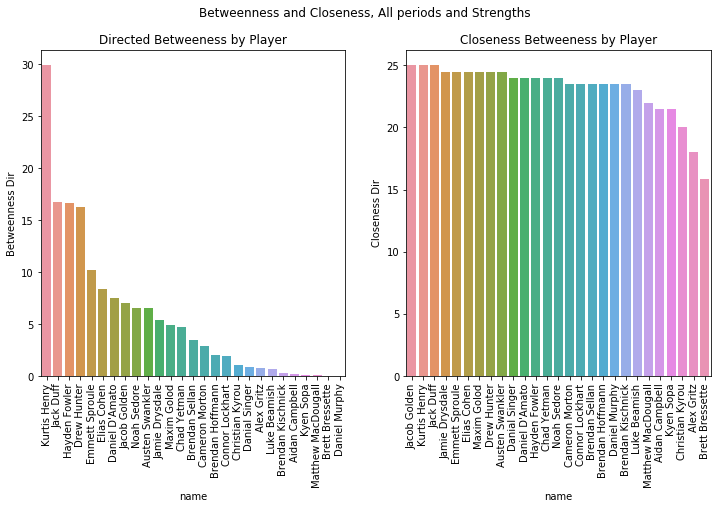

In [326]:
#lets make some graphs of Betweenness and Closeness
fig, axes = plt.subplots(1, 2,figsize = (12, 6))
fig.suptitle('Betweenness and Closeness, All periods and Strengths')

#Betweeness
axes[0].set_title('Directed Betweeness by Player')
node=node_measure.sort_values('Betweenness Dir', ascending=False)
sns.barplot(ax=axes[0], x="name", y="Betweenness Dir", data=node)
axes[0].tick_params(axis='x', labelrotation=90)
axes[1].set_title('Closeness Betweeness by Player')
#Closeness
node=node_measure.sort_values('Closeness Dir', ascending=False)
ax1=sns.barplot(ax=axes[1], x="name", y="Closeness Dir", data=node)
axes[1].tick_params(axis='x', labelrotation=90)

In [327]:
#Lets dig into this a bit more. Split the data by period depending on whether the team is up/even-strength or down

passes.loc[passes['Home Team'] =="Erie Otters", 'GameS'] = (passes['Home Team Goals']-passes['Away Team Goals'])
passes.loc[passes['Away Team'] =="Erie Otters", 'GameS'] = (passes['Away Team Goals']-passes['Home Team Goals'])
passes.to_csv('passes.csv')
#Period 1 up-even
period1_pos=passes.loc[(passes["GameS"]>=0)&(passes["Period"]==1)]

period1_pos=pd.DataFrame(period1_pos['Player 2'].groupby(period1_pos['Player']).value_counts(sort=True))
#period1_pos.columns=['Weight']
period1_pos.to_csv('period1_pos.csv')

#Period 1 behind
period1_neg=passes.loc[(passes["GameS"]<0)&(passes["Period"]==1)]
period1_neg=pd.DataFrame(period1_neg['Player 2'].groupby(period1_neg['Player']).value_counts(sort=True))
period1_neg.columns=['Weight']
period1_neg.to_csv('period1_neg.csv')

#Period 2 up-even

period2_pos=passes.loc[(passes["GameS"]>=0)&(passes["Period"]==2)]
period2_pos=pd.DataFrame(period2_pos['Player 2'].groupby(period2_pos['Player']).value_counts(sort=True))
period2_pos.columns=['Weight']
period2_pos.to_csv('period2_pos.csv')

#Period 2 behind
period2_neg=passes.loc[(passes["GameS"]<0)&(passes["Period"]==1)]
period2_neg=pd.DataFrame(period2_neg['Player 2'].groupby(period2_neg['Player']).value_counts(sort=True))
period2_neg.columns=['Weight']
period2_neg.to_csv('period2_neg.csv')

#Period 3 up-even

period3_pos=passes.loc[(passes["GameS"]<=0)&(passes["Period"]==3)]
period3_pos=pd.DataFrame(period3_pos['Player 2'].groupby(period3_pos['Player']).value_counts(sort=True))
period3_pos.columns=['Weight']
period3_pos.to_csv('period3_pos.csv')

#Period 3 behind

period3_neg=passes.loc[(passes["GameS"]<0)&(passes["Period"]==3)]
period3_neg=pd.DataFrame(period3_neg['Player 2'].groupby(period3_neg['Player']).value_counts(sort=True))
period3_neg.columns=['Weight']
period3_neg.to_csv('period3_neg.csv')
passes.head()

,Number,name,Pos.,GP,G,A,Pts,PIM,PlusMinus,Age,game_date,Home Team,Away Team,Period,Clock,Home Team Skaters,Away Team Skaters,Home Team Goals,Away Team Goals,Team,Player,Event,X Coordinate,Y Coordinate,Detail 1,Detail 2,Detail 3,Detail 4,Player 2,X Coordinate 2,Y Coordinate 2,GameS
0,4,Jamie Drysdale,D,49,9,38,47,24,9,17,2019-09-20,Erie Otters,Sudbury Wolves,1,19:32,5,5,0,0,Erie Otters,Jamie Drysdale,Play,9,74,Indirect,NaN,NaN,NaN,Kurtis Henry,4.0,29.0,0.0
1,4,Jamie Drysdale,D,49,9,38,47,24,9,17,2019-09-20,Erie Otters,Sudbury Wolves,1,19:20,5,5,0,0,Erie Otters,Jamie Drysdale,Play,23,44,Direct,NaN,NaN,NaN,Brendan Sellan,42.0,61.0,0.0
2,4,Jamie Drysdale,D,49,9,38,47,24,9,17,2019-09-20,Erie Otters,Sudbury Wolves,1,19:12,5,5,0,0,Erie Otters,Jamie Drysdale,Incomplete Play,139,4,Direct,NaN,NaN,NaN,Hayden Fowler,189.0,18.0,0.0
3,4,Jamie Drysdale,D,49,9,38,47,24,9,17,2019-09-20,Erie Otters,Sudbury Wolves,1,19:04,5,5,0,0,Erie Otters,Jamie Drysdale,Play,87,24,Direct,NaN,NaN,NaN,Danial Singer,116.0,80.0,0.0
4,4,Jamie Drysdale,D,49,9,38,47,24,9,17,2019-09-20,Erie Otters,Sudbury Wolves,1,18:34,5,5,0,0,Erie Otters,Jamie Drysdale,Play,56,59,Direct,NaN,NaN,NaN,Emmett Sproule,84.0,25.0,0.0


Lets read back in all our cytoscape computations and do some analysis

In [328]:
#Read everything back in after passing through Cyctoscape
#Period 1
p1p_pos=pd.read_csv('period1_pos_weights.csv')
p1p_neg=pd.read_csv('period1_neg_weights.csv')
#Period 2
p2p_pos=pd.read_csv('period3_pos_weights.csv')
p2p_neg=pd.read_csv('period3_neg_weights.csv')
#Period 3
p3p_pos=pd.read_csv('period3_pos_weights.csv')
p3p_neg=pd.read_csv('period3_neg_weights.csv')




#If we do a diff does anything stand out? Let's find out.
#Period 1
p1p_pos['diff']=(p1p_neg['Betweenness Dir']-p1p_pos['Betweenness Dir'])
p1p_pos['Cdiff']=(p1p_neg['Closeness Dir']-p1p_pos['Closeness Dir'])
#Period 2
p2p_pos['diff']=(p2p_neg['Betweenness Dir']-p2p_pos['Betweenness Dir'])
p2p_pos['Cdiff']=(p2p_neg['Closeness Dir']-p2p_pos['Closeness Dir'])
#Period 3
p3p_pos['diff']=(p3p_neg['Betweenness Dir']-p3p_pos['Betweenness Dir'])
p3p_pos['Cdiff']=(p3p_neg['Closeness Dir']-p3p_pos['Closeness Dir'])

#Realised that using player names as a caption is a pain, so lets do a messy merge, 
#would have been smarter to do this before running through cytoscape 
#(doing it this way saved my bacon when I realised the merge was off)


#Period 1 
p1p_pos=pd.merge(player_bio, p1p_pos, on="name", copy=False)
p1p_neg=pd.merge(player_bio, p1p_neg, on="name", copy=False)

#Period 2
p2p_pos=pd.merge(player_bio, p2p_pos, on="name", copy=False)
p2p_neg=pd.merge(player_bio, p2p_neg, on="name", copy=False)

#Period 3
p3p_pos=pd.merge(player_bio, p3p_pos, on="name", copy=False)
p3p_neg=pd.merge(player_bio, p3p_neg, on="name", copy=False)


p1p_pos=p1p_pos.sort_values('Betweenness Dir', ascending=False).reset_index(drop=True)


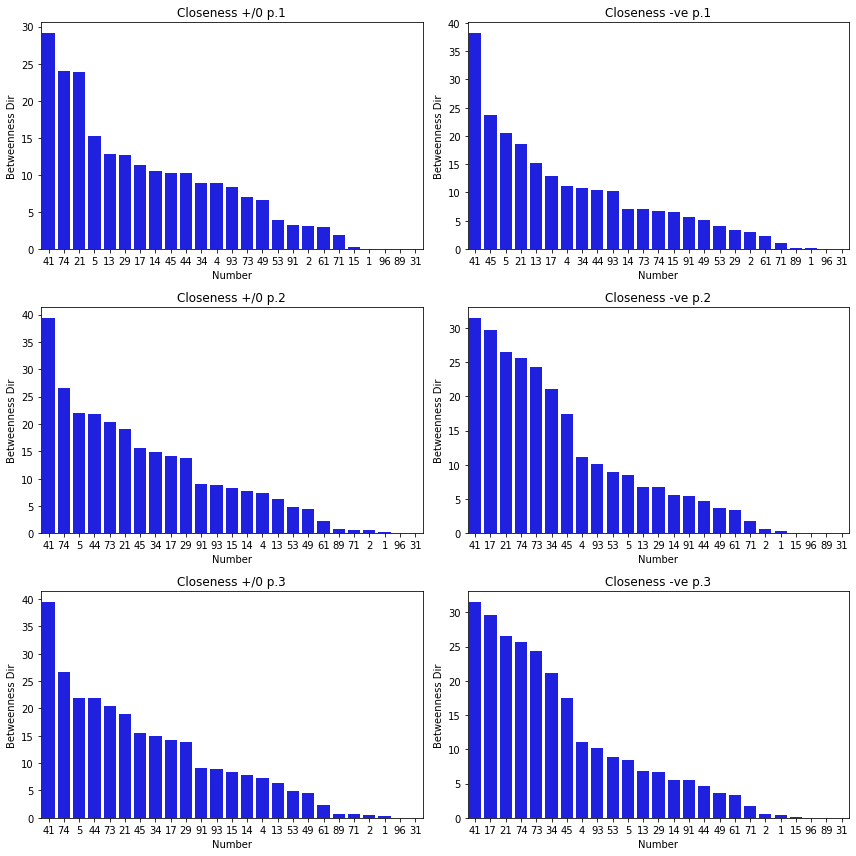

In [329]:
#Lets plot some Graphs
#Set up subplots

#Lets look at Betweenness
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
#Period 1

sns.barplot(ax=axes[0, 0],x="Number",y="Betweenness Dir",
            order=p1p_pos.sort_values('Betweenness Dir', ascending=False).Number, color='blue',data=p1p_pos)
axes[0,0].set_title('Closeness +/0 p.1')
ax1.tick_params(axis='x', labelrotation=90)

sns.barplot(ax=axes[0, 1],x="Number", y="Betweenness Dir",
            order=p1p_neg.sort_values('Betweenness Dir', ascending=False).Number, color='blue',data=p1p_neg)
axes[0,1].set_title('Closeness -ve p.1')
ax1.tick_params(axis='x', labelrotation=90)


#Period 2


sns.barplot(ax=axes[1, 0],x="Number", y="Betweenness Dir",
            order=p2p_pos.sort_values('Betweenness Dir', ascending=False).Number,color='blue', data=p2p_pos)
axes[1,0].set_title('Closeness +/0 p.2')
ax1.tick_params(axis='x', labelrotation=90)


sns.barplot(ax=axes[1, 1],x="Number", y="Betweenness Dir",
            order=p2p_neg.sort_values('Betweenness Dir', ascending=False).Number, color='blue',data=p2p_neg)
axes[1,1].set_title('Closeness -ve p.2')
ax1.tick_params(axis='x', labelrotation=90)



#Period 3

p3p_pos=p3p_pos.sort_values('Betweenness Dir', ascending=False)
sns.barplot(ax=axes[2, 0],x="Number", y="Betweenness Dir",
            order=p3p_pos.sort_values('Betweenness Dir', ascending=False).Number, color='blue',data=p3p_pos)
axes[2,0].set_title('Closeness +/0 p.3')
ax1.tick_params(axis='x', labelrotation=90)

p3p_neg=p3p_neg.sort_values('Betweenness Dir', ascending=False)
sns.barplot(ax=axes[2, 1],x="Number", y="Betweenness Dir",
            order=p3p_neg.sort_values('Betweenness Dir', ascending=False).Number,color='blue', data=p3p_neg)
axes[2,1].set_title('Closeness -ve p.3')
ax1.tick_params(axis='x', labelrotation=90)



plt.tight_layout()
plt.savefig('Betweenness.png')

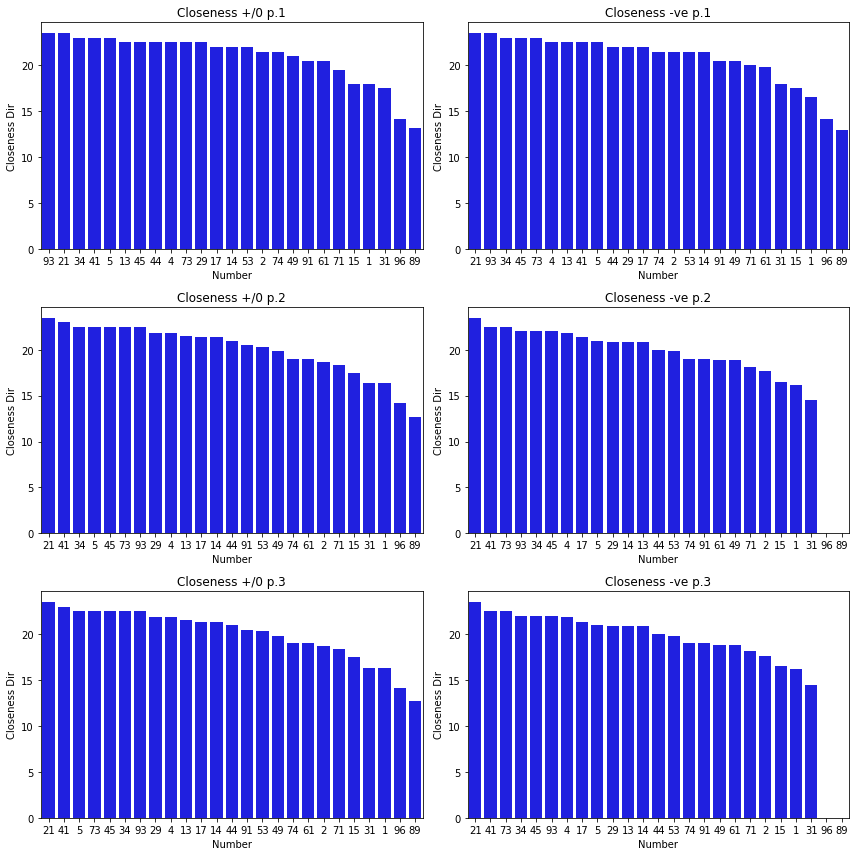

In [330]:
# Lets plot some Graphs
#Set up subplots

#Lets look at Closeness
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
#Period 1

sns.barplot(ax=axes[0, 0],x="Number",y="Closeness Dir",
            order=p1p_pos.sort_values('Closeness Dir', ascending=False).Number, color='blue',data=p1p_pos)
axes[0,0].set_title('Closeness +/0 p.1')
ax1.tick_params(axis='x', labelrotation=90)

sns.barplot(ax=axes[0, 1],x="Number", y="Closeness Dir",
            order=p1p_neg.sort_values('Closeness Dir', ascending=False).Number,color='blue', data=p1p_neg)
axes[0,1].set_title('Closeness -ve p.1')
ax1.tick_params(axis='x', labelrotation=90)


#Period 2


sns.barplot(ax=axes[1, 0],x="Number", y="Closeness Dir",
            order=p2p_pos.sort_values('Closeness Dir', ascending=False).Number, color='blue',data=p2p_pos)
axes[1,0].set_title('Closeness +/0 p.2')
ax1.tick_params(axis='x', labelrotation=90)


sns.barplot(ax=axes[1, 1],x="Number", y="Closeness Dir",
            order=p2p_neg.sort_values('Closeness Dir', ascending=False).Number, color='blue',data=p2p_neg)
axes[1,1].set_title('Closeness -ve p.2')
ax1.tick_params(axis='x', labelrotation=90)



#Period 3

p3p_pos=p3p_pos.sort_values('Closeness Dir', ascending=False)
sns.barplot(ax=axes[2, 0],x="Number", y="Closeness Dir",
            order=p3p_pos.sort_values('Closeness Dir', ascending=False).Number, color='blue',data=p3p_pos)
axes[2,0].set_title('Closeness +/0 p.3')
ax1.tick_params(axis='x', labelrotation=90)

p3p_neg=p3p_neg.sort_values('Closeness Dir', ascending=False)
sns.barplot(ax=axes[2, 1],x="Number", y="Closeness Dir",
            order=p3p_neg.sort_values('Closeness Dir', ascending=False).Number,color='blue', data=p3p_neg)
axes[2,1].set_title('Closeness -ve p.3')
ax1.tick_params(axis='x', labelrotation=90)


plt.tight_layout()
plt.savefig('Closeness.png')

Digging into the players highlighted in the network analysis...

C:\Users\ladal\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ladal\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


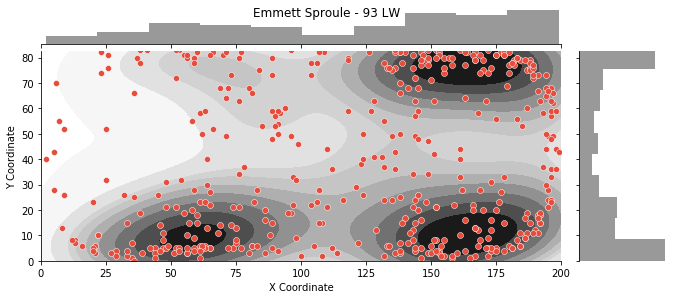

In [331]:
#Lets look at the shot morphology. It was a pain to do this in subplots, 
#if you want to change it to look at a different player just changed the player number

play_filt=passes.loc[(passes['Event']=="Play")&(passes['name']=="Emmett Sproule")]
x=play_filt["X Coordinate"]
y=play_filt["Y Coordinate"]
g = sns.JointGrid(x, y, xlim=(0,200), ylim=(0,82.5))
g.plot_joint(sns.kdeplot, shade=True, cmap="Greys", n_levels=10)
g.plot_joint(sns.scatterplot, color='#e74c3c')
g.plot_marginals(sns.distplot, color="black", bins=10, kde=False)
g.fig.set_figwidth(10)
g.fig.set_figheight(4)
g.fig.suptitle("Emmett Sproule - 93 LW")

plt.savefig('93L.png')
plt.show()

In [332]:
#Some shifts to asses plays that precede shots

scout['sh_event'] = scout['Event'].shift(-1)
scout['sh_player'] = scout['Player'].shift(-1)
scout['sh_detail'] = scout['Detail 2'].shift(-1)


shots=scout.loc[(scout["Event"]=="Play")&(scout["sh_event"]=="Shot")&(scout["Detail 1"]=="Direct")
                &(scout["Team"]=="Erie Otters")& 
               (scout['Home Team Skaters']==5)&(scout['Away Team Skaters']==5)]
shots.head()


,game_date,Home Team,Away Team,Period,Clock,Home Team Skaters,Away Team Skaters,Home Team Goals,Away Team Goals,Team,Player,Event,X Coordinate,Y Coordinate,Detail 1,Detail 2,Detail 3,Detail 4,Player 2,X Coordinate 2,Y Coordinate 2,sh_event,sh_player,sh_detail
86,2019-09-20,Erie Otters,Sudbury Wolves,1,17:19,5,5,0,0,Erie Otters,Elias Cohen,Play,184,18,Direct,NaN,NaN,NaN,Kurtis Henry,131.0,6.0,Shot,Kurtis Henry,Missed
177,2019-09-20,Erie Otters,Sudbury Wolves,1,14:21,5,5,0,0,Erie Otters,Emmett Sproule,Play,136,36,Direct,NaN,NaN,NaN,Brendan Hoffmann,161.0,56.0,Shot,Brendan Hoffmann,Missed
338,2019-09-20,Erie Otters,Sudbury Wolves,1,9:35,5,5,1,0,Erie Otters,Luke Beamish,Play,185,65,Direct,NaN,NaN,NaN,Alex Gritz,182.0,44.0,Shot,Alex Gritz,On Net
425,2019-09-20,Erie Otters,Sudbury Wolves,1,6:35,5,5,1,0,Erie Otters,Emmett Sproule,Play,170,79,Direct,NaN,NaN,NaN,Brendan Hoffmann,143.0,47.0,Shot,Brendan Hoffmann,On Net
543,2019-09-20,Erie Otters,Sudbury Wolves,1,3:06,5,5,1,1,Erie Otters,Chad Yetman,Play,180,64,Direct,NaN,NaN,NaN,Danial Singer,163.0,51.0,Shot,Danial Singer,Blocked


In [333]:
#filter for total shots
shots=scout.loc[(scout["Event"]=="Play")&(scout["sh_event"]=="Shot")&(scout["Detail 1"]=="Direct")
                &(scout["Team"]=="Erie Otters")& 
               (scout['Home Team Skaters']==5)&(scout['Away Team Skaters']==5)]
ss = shots.groupby('Player').size().reset_index(name='Count')
ss=ss.sort_values('Count', ascending=False)

#filter for total passes
total =scout.loc[(scout["Event"]=="Play")&(scout["Detail 1"]=="Direct")
                &(scout["Team"]=="Erie Otters")&
               (scout['Home Team Skaters']==5)&(scout['Away Team Skaters']==5)]
ts=total.groupby('Player').size().reset_index(name='Count')

#filter for on net shots
shots=scout.loc[(scout["Event"]=="Play")&(scout["sh_event"]=="Shot")&(scout["Detail 1"]=="Direct")
                &(scout["Team"]=="Erie Otters")& 
               (scout['Home Team Skaters']==5)&(scout['Away Team Skaters']==5)&(scout['sh_detail']=='On Net')]
so = shots.groupby('Player').size().reset_index(name='Count')
so=so.sort_values('Count', ascending=False)



In [334]:
#Compute percentage of passes that lead to shots
ss=pd.merge(ss, ts, on="Player", copy=False)
ss["percent"]=ss["Count_x"]/ss["Count_y"]
ss=ss.sort_values('percent', ascending=False)

#Compute precentage of passes that lead to on target shots
so=pd.merge(so, ts, on="Player", copy=False)
so["percent"]=so["Count_x"]/so["Count_y"]
so=so.sort_values('percent', ascending=False)
ss.head()

,Player,Count_x,Count_y,percent
1,Emmett Sproule,88,342,0.257310
2,Austen Swankler,78,310,0.251613
11,Kyen Sopa,29,116,0.250000
0,Maxim Golod,94,422,0.222749
6,Elias Cohen,51,229,0.222707


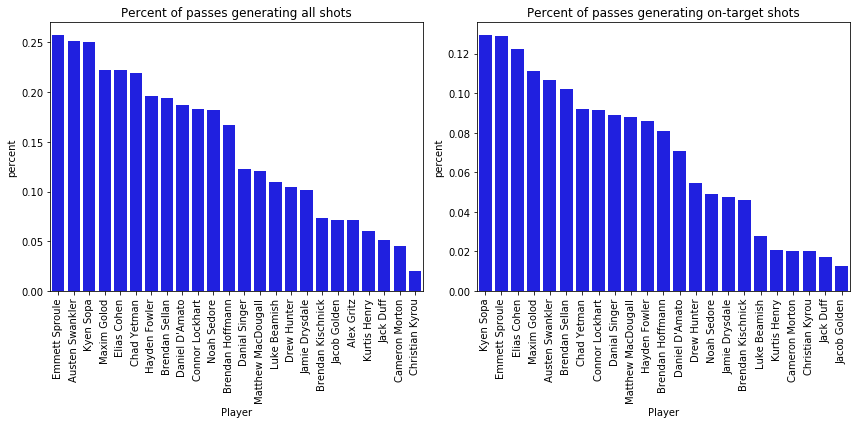

In [335]:
fig, axes = plt.subplots(1, 2,figsize = (12, 6))


#Percent of passes leading to all shots
axes[0].set_title('Percent of passes generating all shots')
sns.barplot(ax=axes[0], x="Player", y="percent", color='blue', data=ss)
axes[0].tick_params(axis='x', labelrotation=90)
axes[1].set_title('Percent of passes generating on-target shots')

#Percent of passes leading to on-target shots
ax1=sns.barplot(ax=axes[1], x="Player", y="percent", color='blue', data=so)
axes[1].tick_params(axis='x', labelrotation=90)
plt.tight_layout()
plt.savefig('shot generation.png')

This next section is where I started messing with a bunch of stuff for a ML regression estimate of shot difficulty. It's kind of works but isnt validated or stable. Use very much at your own risk

In [303]:

ppc=pd.read_csv('ppc.csv')
pl_pssr=pd.read_csv('playerid.csv')
pl_ps2=pd.read_csv('playerid2.csv')
pl_pss=pd.merge(pl_pssr, ppc, on="Player", copy=False)
pl_pss2=pd.merge(pl_ps2, pl_pss, on="Player 2", copy=False)
pl_pss2.head()
pl_pss2.to_csv('pl_ps2.csv')

In [ ]:
passes=scout.loc[(scout['Home Team Skaters']==5)&(scout['Away Team Skaters']==5)&(scout['Event']=="Play")|(scout['Event']=="Incomplete Play")]
passes=passes.loc[(passes['Team']=="Erie Otters")]
pass_sucess=pd.DataFrame(passes['Player 2'].groupby(passes['Event']).value_counts(sort=True))
pass_sucess.to_csv('pass_success_r.csv')



In [90]:
shot=scout.loc[(scout['Home Team Skaters']==5)&(scout['Away Team Skaters']==5)&(scout['Event']=="Shot")&(scout['Away Team']=="Erie Otters")]

In [ ]:
scout.head(50)

In [ ]:
passes_success=passes.loc[(passes['Event']=="Play")]
passes_fail=passes.loc[(passes['Event']=="Incomplete Play")]

ax=sns.scatterplot(data=passes_fail, x="X Coordinate" ,y="Y Coordinate",color="yellow")
ax=sns.scatterplot(data=passes_success, x="X Coordinate" ,y="Y Coordinate",color="purple")

In [ ]:
scout.head()

In [91]:

scout['Counter'] = scout.groupby((scout.Team != scout.Team.shift()).cumsum()).cumcount()
scout['Distance'] =((scout['X Coordinate']-scout['X Coordinate 2'])**2+(scout['Y Coordinate']-scout['Y Coordinate 2'])**2)**0.5
#scout['Home']=scout['Distance']

scout.loc[scout['Team'] == scout['Home Team'], 'Home'] = 1
scout.loc[scout['Team'] != scout['Home Team'], 'Home'] = 0
#scout['Pressure']=scout['Distance']

scout.loc[scout['Y Coordinate'] >= 125, 'Pressure'] = 3
scout.loc[scout['Y Coordinate'] <= 125, 'Pressure'] = 0
scout.head(50)

,game_date,Home Team,Away Team,Period,Clock,Home Team Skaters,Away Team Skaters,Home Team Goals,Away Team Goals,Team,...,Detail 2,Detail 3,Detail 4,Player 2,X Coordinate 2,Y Coordinate 2,Counter,Distance,Home,Pressure
0,2019-09-20,Erie Otters,Sudbury Wolves,1,20:00,5,5,0,0,Sudbury Wolves,...,NaN,NaN,NaN,Connor Lockhart,NaN,NaN,0,NaN,0.0,0.0
1,2019-09-20,Erie Otters,Sudbury Wolves,1,19:58,5,5,0,0,Sudbury Wolves,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,0.0,0.0
2,2019-09-20,Erie Otters,Sudbury Wolves,1,19:53,5,5,0,0,Sudbury Wolves,...,NaN,NaN,NaN,Blake Murray,74.0,35.0,2,32.202484,0.0,0.0
3,2019-09-20,Erie Otters,Sudbury Wolves,1,19:52,5,5,0,0,Erie Otters,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1.0,0.0
4,2019-09-20,Erie Otters,Sudbury Wolves,1,19:51,5,5,0,0,Erie Otters,...,NaN,NaN,NaN,Connor Lockhart,94.0,46.0,1,12.369317,1.0,0.0
5,2019-09-20,Erie Otters,Sudbury Wolves,1,19:48,5,5,0,0,Sudbury Wolves,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,0.0
6,2019-09-20,Erie Otters,Sudbury Wolves,1,19:45,5,5,0,0,Sudbury Wolves,...,NaN,NaN,NaN,Blake Murray,29.0,2.0,1,62.393910,0.0,0.0
7,2019-09-20,Erie Otters,Sudbury Wolves,1,19:39,5,5,0,0,Sudbury Wolves,...,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,0.0,0.0
8,2019-09-20,Erie Otters,Sudbury Wolves,1,19:38,5,5,0,0,Sudbury Wolves,...,NaN,NaN,NaN,Owen Gilhula,82.0,54.0,3,4.000000,0.0,0.0
9,2019-09-20,Erie Otters,Sudbury Wolves,1,19:36,5,5,0,0,Sudbury Wolves,...,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,0.0,0.0


In [ ]:

passes=passes.loc[(scout['Detail 1']=="Direct")]
passes.loc[passes['Event'] =="Play", 'Event'] = 1
passes.loc[passes['Event'] =="Incomplete Play", 'Event'] = 0
adjacent=(passes['Y Coordinate 2']-passes['Y Coordinate'])
opposite=(passes['X Coordinate 2']-passes['X Coordinate'])
passes['Distance'] =((passes['X Coordinate']-passes['X Coordinate 2'])**2+(passes['Y Coordinate']-passes['Y Coordinate 2'])**2)**0.5
oa=opposite/adjacent
from datetime import datetime
#passes['Clock'] = pd.to_datetime(passes['Clock'],format='%M:%S')
#passes['Clock2'] = passes['Clock'].apply(lambda x: 
                                   # datetime.strptime(x,'%M:%S'))
#passes['Clock2'] = passes['Clock'].apply(lambda x: 
                                   # datetime.time(x,'%M:%S'))
passes['Clock2']=pd.to_datetime(passes['Clock'], format='%M:%S') - pd.to_datetime(passes['Clock'], format='%M:%S').dt.normalize()
passes['Clock2']=passes['Clock2'].dt.total_seconds().astype(int)
passes['Time_E']=(1200-passes['Clock2'])+(1200*(passes['Period']-1))
passes['Angle']=np.rad2deg(np.arctan(abs(oa)))
passes.loc[passes['Home Team'] =="Erie Otters", 'GameS'] = (passes['Home Team Goals']-passes['Away Team Goals'])
passes.loc[passes['Away Team'] =="Erie Otters", 'GameS'] = (passes['Away Team Goals']-passes['Home Team Goals'])
#passes['Angle'] = passes['Angle'].replace (['Inf'],'0')
#passes['Angle'] = passes['Angle'].replace (['NaN'],'0')



passes.head()

In [ ]:
#train=passes.loc[(passes["Team"]=="Erie Otters")]
#test=passes.loc[(passes["Team"]=="Erie Otters")]
#passes=pd.read_csv('passes.csv')
passes['Distance'] =((passes['X Coordinate']-passes['X Coordinate 2'])**2+(passes['Y Coordinate']-passes['Y Coordinate 2'])**2)**0.5
passes.loc[passes['X Coordinate'] == passes['X Coordinate 2'], 'Angle'] = 90
passes.loc[passes['Y Coordinate'] == passes['Y Coordinate 2'], 'Angle'] = 0

train, test = train_test_split(passes)
train_p = train[['GameS','Angle','X Coordinate','Y Coordinate','X Coordinate 2','Y Coordinate 2','Distance','Time_E']]
test_p = test[['GameS','Angle','X Coordinate','Y Coordinate','X Coordinate 2','Y Coordinate 2','Distance','Time_E']]

target=train.Event
target_t=test.Event
train_p.head()
#'X Coordinate','Y Coordinate',
#'X Coordinate','Y Coordinate',
test_p.head()

In [ ]:
from pygam import LinearGAM, s, f
#gam = LinearGAM(s(0, n_splines=100) + s(1) + f(2) + s(3))
lams = np.random.rand(100, 8)
lams = lams * 11 - 3
lams = np.exp(lams)
print(lams.shape)

lin_gam = LinearGAM(n_splines=50).gridsearch(train_p.values, target.values, lam=lams)

In [ ]:
y_pred = model.predict(test_p)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(target_t, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
import math
#predictions
pred=1/(1+np.exp(-y_pred))
test['Pred']=pred
test.info(50)
#print, np.min(pred)


In [ ]:
test1=test.loc[(test['Team']=="Erie Otters")]
result = test1.groupby('Player').agg({'Pred': ['mean', 'min', 'max']})
pass_sucess=pd.read_csv('pass_success.csv')
#result["Mean"]=result["(Pred, mean)"]
result.rename({'(Pred, mean) ':'Mean'}, inplace=True)
result.columns = result.columns.droplevel(0)
result=pd.merge(result, pass_sucess, on="Player", copy=False)
result.head(50)
inc=result.loc[result['Event']=='Incomplete Play']
result=result.loc[result['Event']=='Play']
result=result=pd.merge(result, inc , on="Player", copy=False)
result['Sucessful']=result['Event.1_x']/(result['Event.1_x']+result['Event.1_y'])
result.head()

In [ ]:
#ax=sns.regplot(data=result, x="Sucessful" ,y="mean",color="Purple")
from plotly.subplots import make_subplots


import plotly.graph_objects as go
from plotly.subplots import make_subplots

#fig = px.line(x=[0.6,0.7,0.8], y=[0.6,0.7,0.8], range_x=[.64,.7], labels={
           #          "x": "Mean Predicted Pass Completion likelihood %",
           #          "y": "Pass Completion Rate %"})
fig1 = px.scatter(result, x='mean_x', y='Sucessful', text='Player')
fig1.update_layout(
     title={
        'text': "Pass Completion vs Pass Difficulty",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title="% of completed passes",
    yaxis_title="Predicted Pass Difficulty",)
import plotly.io as pio


fig1.show()


